In [ ]:
# 1. Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Embedding, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import imdb

In [2]:
# 2. Load the dataset
# Using IMDb dataset from Keras (10,000 most frequent words)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

In [4]:
# 3. Data Preprocessing
# Pad sequences to ensure equal input size for all samples
max_len = 100  # maximum length of the review
x_train_padded = pad_sequences(x_train, maxlen=max_len, padding='post', truncating='post')
x_test_padded = pad_sequences(x_test, maxlen=max_len, padding='post', truncating='post')

In [5]:
# 4. Define the RNN model using LSTM (or GRU)
model = Sequential()

# Embedding layer for text representation
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_len))

# LSTM layer (can also try GRU)
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))

# Fully connected layer for output prediction
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification (positive/negative)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

e:\B.E\DL\venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [6]:
# 5. Train the model
history = model.fit(x_train_padded, y_train, epochs=5, batch_size=64, validation_data=(x_test_padded, y_test))

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 48s 115ms/step - accuracy: 0.6221 - loss: 0.6348 - val_accuracy: 0.7946 - val_loss: 0.4780
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 43s 109ms/step - accuracy: 0.8078 - loss: 0.4606 - val_accuracy: 0.7976 - val_loss: 0.4597
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 105ms/step - accuracy: 0.8616 - loss: 0.3502 - val_accuracy: 0.7966 - val_loss: 0.4696
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 40s 103ms/step - accuracy: 0.8804 - loss: 0.3056 - val_accuracy: 0.8065 - val_loss: 0.4788
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 39s 101ms/step - accuracy: 0.9032 - loss: 0.2545 - val_accuracy: 0.7920 - val_loss: 0.5550


In [7]:
# 6. Evaluate the model
test_loss, test_acc = model.evaluate(x_test_padded, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")

782/782 - 9s - 12ms/step - accuracy: 0.7920 - loss: 0.5550
Test Accuracy: 0.7920


In [8]:
# 7. Make Predictions on test data
y_pred = model.predict(x_test_padded)

# Convert predictions to binary (0 or 1)
y_pred_binary = (y_pred > 0.5).astype(int)

782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step


In [9]:
# 8. Display a few sample predictions
for i in range(5):
    print(f"Review #{i+1}: {'Positive' if y_pred_binary[i] == 1 else 'Negative'}")

Review #1: Negative
Review #2: Positive
Review #3: Positive
Review #4: Negative
Review #5: Positive


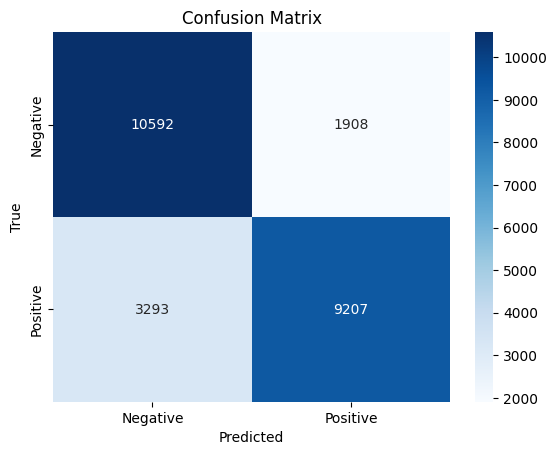

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_binary)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()